<h1> Projeto Wireless Power Transmission (WPT) - ETAPA 1 </h1>

<h2>Objetivo:</h2>
Transmitir energia elétrica entre dois pontos a pelo ar. (WIP)

<h3> Integrantes do grupo: </h3>  
Bernardo Cunha Capoferri  
Guilherme Dantas Rameh  
Henrique Martinelli Frezzatti  
Lívia Sayuri Makuta

<p style='text-align: justify;'>Uma das tecnologias mais utilizadas para a transferência de energia pelo ar – WPT (Wireless Power Transfer) – consiste no chamado “acoplamento ressonante por campos próximos – near field ressonant coupling”. Como há duas bobinas (uma transmissora e outra receptora), o fenômeno da transmissão de energia pelo ar se assemelha bastante ao funcionamento de um transformador convencional. Exatamente por isso, e para nossa sorte, é possível utilizar o modelo elétrico do transformador para simular um circuito WPT.</p>
<br>
<br>
<div>  
<img src="exemploProj.png" align="center" width="300"/>     
</div>
<br>

<p style='text-align: justify;'>Uma importante diferença entre um transformador com núcleo de ferro e um outro sem esse núcleo (como no caso da transmissão pelo ar) é que a intensidade do campo magnético produzido pela bobina primária, por exemplo, não será igual à intensidade do campo magnético no interior da bobina secundária, hipótese que usamos para construir o modelo do transformador. Contudo, a engenharia é conhecida exatamente pela engenhosidade das soluções encontradas, não é mesmo?
Em um transformador convencional, a indutância mútua é calculada usando $M=\sqrt {L_1\cdot L_2}$. A definição de indutância mútua consiste na razão entre o fluxo magnético total em uma bobina e a corrente na outra. Ora, se apenas parte do fluxo magnético produzido por uma das bobinas chega à outra, nada mais simples do que considerar um “fator de acoplamento k”, de tal modo que $M=k\cdot \sqrt {L_1\cdot L_2}$. Esse fator de acoplamento pode variar entre 0 e 1, sendo 1 apenas quando há um núcleo de ferro entre as bobinas.</p>

Mesmo sem sabermos a relação entre $k$ e a distância entre as bobinas, sabemos, intuitivamente, que quanto maior a distância, menor será o $k$. 
<br>
<br>

<p style='text-align: justify;'>O acoplamento ressonante faz com que o campo magnético entre as bobinas aumente em intensidade,
permitindo uma transmissão eficiente a maiores distâncias. O que tentaremos modelar nesse projeto é um
acoplamento de bobinas ressonantes que não estejam tão próximas, sendo que somente o ar estará presente
entre elas.</p>

<br>
<br>








<h3>1.1 - Elaboração do diagrama do modelo eletrodinâmico do circuito WPT </h3> <br>

<p style='text-align: justify;'>Essa atividade consiste em especificar, por meio de um circuito, o modelo eletrodinâmico WPT usando abordagem fasorial. Para isso, o modelo eletrodinâmico do transformador deve ser adaptado de modo a considerar o parâmetro 𝑘 e os capacitores $C1$ e $C2$, lembrando que $C1$ deve estar em série com a bobina primária, e $C2$ em paralelo
com a secundária; no projeto, vamos considerar que as bobinas transmissora e receptora sejam iguais, ou seja, $L1$ = $L2$. Do mesmo modo, os capacitores também devem ser iguais ($C1$ = $C2$), de modo que a frequência de ressonância dos conjuntos $LC$ seja a mesma no primário e secundário. Pesquise sobre como calcular a frequência de ressonância de um conjunto $LC$.</p>
<br>
<br>

<div>
    <img src="projetoeletromag_circuitoCerto.png" align="center" width="600"/>
</div>

In [13]:
# Importando bibliotecas necessárias para o projeto.
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

<h4> Definindo as variáveis do projeto </h4>

Abaixo são definidas as resistências, as capacitâncias que são iguais e as indutâncias que são iguais. Além disso, também foi definido inicialmente um valor arbitrário para k, um valor arbitrário para a tensão da bobina primária e um valor igualmente arbitrário para a resistência de carga. 

In [14]:
# Declarando variáveis do transformador
k = 0.1
r1 = 0.2
r2 = 0.2
l1 = 300e-6
l2 = 300e-6
c1 = 10e-6
c2 = 10e-6

# Variaveis do sistema
v1 = rect(10,0)
rc = 100

<h3>1.2 - Código do modelo numérico </h3> </br>

<p style='text-align: justify;'>Essa atividade consiste em escrever um código em Python que simule o
modelo esquematizado no item anterior. O código deve usar como parâmetros os valores das
indutâncias, capacitâncias e resistências das bobinas primária e secundária (neste momento, usem
valores quaisquer, mas razoáveis do ponto de vista físico). Recomenda-se a utilização, como ponto de
partida, do código em Python usado no laboratório 2. Documente seu código explicando cada etapa do
cálculo. Para as simulações iniciais, adotem valores razoáveis para indutâncias, frequência, resistências
e capacitâncias a serem utilizados.</p>

<h4> Definindo as funções</h4>

<p>As funções que serão utilizadas no projeto encontram-se abaixo. A primeira calcula a frequência de ressonância a partir de um valor de indutância e capacitância, já que a fórmula dessa frequência pode ser definida como: </p>

<br>

\begin{equation}
Fr=\frac{1}{2{\pi}\sqrt{LC}}
\end{equation}

<br>

Outrossim, há também a função que calcula a corrente $i1$ e $i2$ das bobinas primária e secundária, repectivamente. Para essa função os valores de entrada são a tensão da bobina primária ($v1$), que é alternada, o valor da resistência de carga ($Rc$) que pode variar, e os valores de frequência $f$ e $k$ que também podem variar, o que será útil para as análises dos gráficos a serem plotados.



In [15]:
# Funções a seren usadas
def calcularFreqRessonancia(l,c):
    fr = 1/(2*pi*sqrt(l*c))
    return fr

def calcularTransformadores(v1, rc, freq, k=k, l1=l1, l2=l2):
    w = 2*pi*freq
    m = k*sqrt(l1*l2)
    # Calculara impedâncias
    xl1 = 1j*w*l1
    xl2 = 1j*w*l2
    xc1 = 1/(1j*w*c1)
    xc2 = 1/(1j*w*c2)
    xm = 1j*w*m
    paralelo = (xc2*rc)/(xc2+rc)
    
    z = np.array([[r1 + xc1 + xl1, -xm],[-xm, xl2 + r2 + paralelo]])
    v = np.array([v1,0])
    i = np.dot(linalg.inv(z),v)
    return i[0], i[1]

<h4> Encontrando a frequência de ressonância </h4>

<p> Para os valores de indutância e capacitância adotados e definidos anteriormente, o valor da frequência de ressonância calculada foi: </p>

In [16]:
fr = calcularFreqRessonancia(l1,c1)
print("Essa é a freq de ressonância", fr)

Essa é a freq de ressonância (2905.758415662736+0j)


<p> Além disso, os gráficos da tensão da bobina secundária por frequência e de potência da bobina secundária por frequência também foram plotados. Nota-se que em um valor próximo da frequência de ressonância há picos em ambos os gráficos </p>

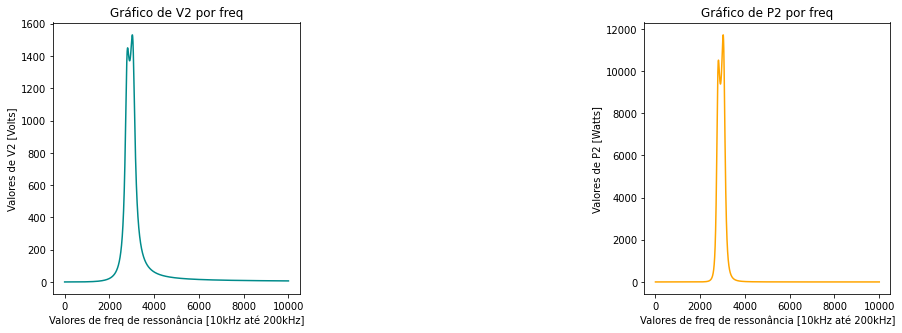

In [17]:
listafreqr = np.linspace(1,10000, 10000)
listaV2proj =[]
listaP2proj = []
for freq in (listafreqr):
    i1proj, i2proj = calcularTransformadores(v1,rc, freq)
    V2proj = i2proj*rc
    V2efproj = V2proj/sqrt(2)
    ief_conjugado = (i2proj.conjugate())/sqrt(2)
    P2proj = V2efproj*ief_conjugado
    listaV2proj.append(abs(V2proj))
    listaP2proj.append(abs(P2proj))

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(listafreqr, listaV2proj, color="darkcyan")
plt.title("Gráfico de V2 por freq")
plt.xlabel("Valores de freq de ressonância [10kHz até 200kHz]")
plt.ylabel("Valores de V2 [Volts]")
    
plt.subplot(1,3,3)
plt.plot(listafreqr, listaP2proj, color="orange")
plt.title("Gráfico de P2 por freq")
plt.xlabel("Valores de freq de ressonância [10kHz até 200kHz]")
plt.ylabel("Valores de P2 [Watts]")
plt.show()

 <h3> 1.3 - Construção de gráficos de I1 e I2 em função da frequência </h3> </br>
 
 <p style='text-align: justify;'> Essa atividade consiste em fazer um gráfico
dos módulos das correntes $i1$ e $i2$ em função da frequência da fonte, para um $k$ (coeficiente de
acoplamento) qualquer inicialmente fixo. A frequência para a qual as correntes são máximas é
coincidente com a frequência de ressonância que vocês obtiveram na atividade 1? O que acontece com
os gráficos dos módulos das correntes quando se altera o $k$ do circuito? Documente os resultados que
obtiveram, pensando em gráficos adicionais que possam esclarecer o funcionamento do circuito.</p>



<h4> Gráfico de $i1$ e $i2$ para o $k$ fixo em 0.1</h4>


Esse é o i1 máximo: 18.942871249523755
Esse é o i2 máximo: 15.30621278095615
Essa é frequência máxima do i1 3064.0
Essa é frequência máxima do i2 3026.0


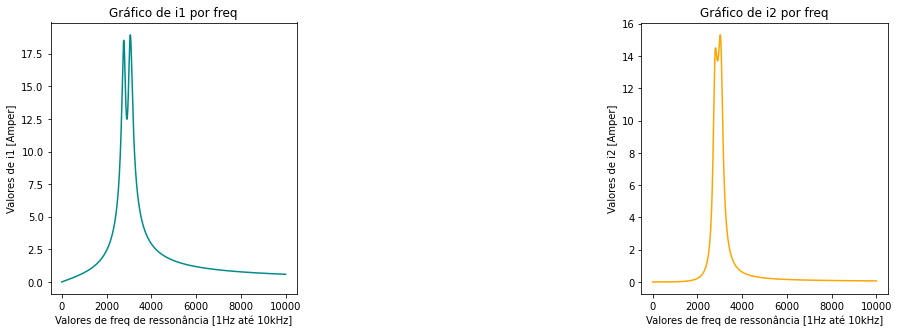

In [18]:
listai1 =[]
listai2 =[]
for freq in (listafreqr):    
    i1proj, i2proj = calcularTransformadores(v1,rc, freq)
    listai1.append(abs(i1proj))
    listai2.append(abs(i2proj))


i1Maximo = max(listai1)
i2Maximo = max(listai2)
print("Esse é o i1 máximo:", max(listai1))
print("Esse é o i2 máximo:", max(listai2))

indexi1 = listai1.index(i1Maximo)
indexi2 = listai2.index(i2Maximo)

freqmaxima1 = listafreqr[indexi1]
freqmaxima2 = listafreqr[indexi2]

print("Essa é frequência máxima do i1", freqmaxima1)
print("Essa é frequência máxima do i2", freqmaxima2)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(listafreqr, listai1, color="darkcyan")
plt.title("Gráfico de i1 por freq")
plt.xlabel("Valores de freq de ressonância [1Hz até 10kHz]")
plt.ylabel("Valores de i1 [Amper]")
    
plt.subplot(1,3,3)
plt.plot(listafreqr, listai2, color="orange")
plt.title("Gráfico de i2 por freq")
plt.xlabel("Valores de freq de ressonância [1Hz até 10kHz]")
plt.ylabel("Valores de i2 [Amper]")
plt.show()

<p> Quando as correntes são máximas, o valor da frequência não é a frequência de ressonância. Porém também percebe-se que esse gráfico apresenta dois picos. Os segundos picos talvez possam ser da frequência de ressonância. </p>

<h4> Gráfico de $i1$ e $i2$ para quando o $k$ varia entre 0 e 0.5 em um intervalo com dez pontos</h4>

<Figure size 1080x360 with 0 Axes>

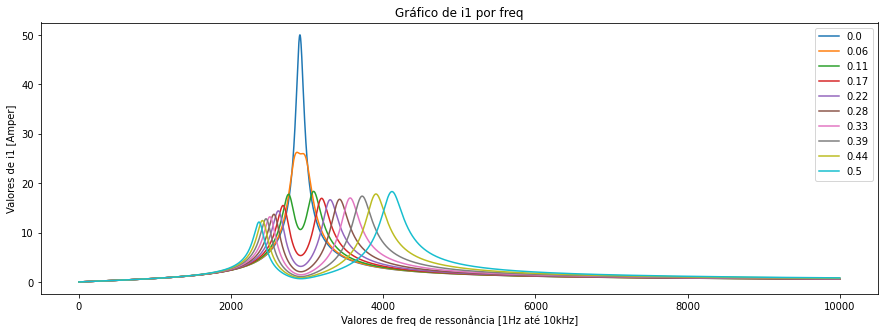

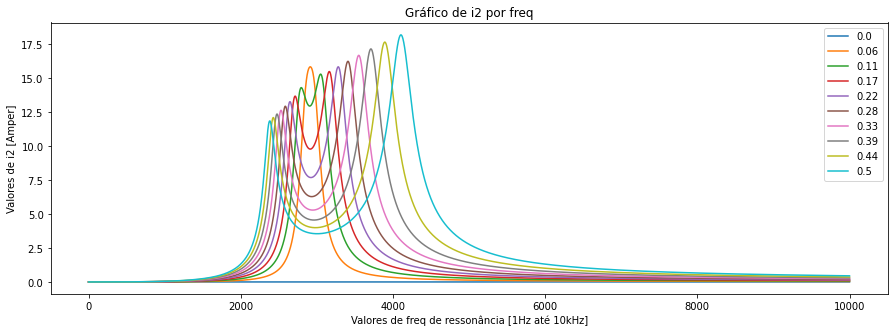

10
Esse é o i1 máximo: 26.226030420588778
Esse é o i2 máximo: 15.831643114479718
Essa é frequência máxima do i1 2868.0
Essa é frequência máxima do i2 2914.0


In [19]:
lista_ks = np.linspace(0,0.5, 10)
plt.figure(figsize=(15,5))

lista_ploti1 = []
lista_ploti2 = []

for k in lista_ks:
    listai1_ks =[]
    listai2_ks =[]
    for freq in (listafreqr):    
        i1proj, i2proj = calcularTransformadores(v1,rc,freq,k=k)
        listai1_ks.append(abs(i1proj))
        listai2_ks.append(abs(i2proj))
    
    lista_ploti1.append(listai1_ks)
    lista_ploti2.append(listai2_ks)
    


plt.figure(figsize=(15,5))
for i in range(len(lista_ploti1)):
    plot = lista_ploti1[i]
    plt.plot(listafreqr, plot, label=f"{round(lista_ks[i], 2)}")
plt.title("Gráfico de i1 por freq")
plt.xlabel("Valores de freq de ressonância [1Hz até 10kHz]")
plt.ylabel("Valores de i1 [Amper]")
plt.legend() 


plt.figure(figsize=(15,5))
for i in range(len(lista_ploti2)):
    plot = lista_ploti2[i]
    plt.plot(listafreqr, plot, label=f"{round(lista_ks[i], 2)}")
plt.title("Gráfico de i2 por freq")
plt.xlabel("Valores de freq de ressonância [1Hz até 10kHz]")
plt.ylabel("Valores de i2 [Amper]")
plt.legend() 

   
plt.show()

print(len(lista_ploti1))
i1Maximo = max(lista_ploti1[1])
i2Maximo = max(lista_ploti2[1])
print("Esse é o i1 máximo:", i1Maximo)
print("Esse é o i2 máximo:", i2Maximo)

indexi1 = lista_ploti1[1].index(i1Maximo)
indexi2 = lista_ploti2[1].index(i2Maximo)

freqmaxima1 = listafreqr[indexi1]
freqmaxima2 = listafreqr[indexi2]

print("Essa é frequência máxima do i1", freqmaxima1)
print("Essa é frequência máxima do i2", freqmaxima2)

<h3> 1.4 - Construção de gráficos das potências e da eficiência em função da frequência </h3>

<p style='text-align: justify;'> Por fim, a última atividade da Etapa 1 consiste em construir gráficos das potências reais de entrada e de saída em função da frequência. Além desses gráficos, vocês construirão um terceiro gráfico que relacionará a eficiência (ou o ganho de potência) do seu sistema com frequência da fonte. Documente os resultados que obtiveram, pensando em gráficos adicionais que possam esclarecer o funcionamento do circuito.</p>

<h4> Gráfico da potência real de carga (saída) em função da frequência </h4>

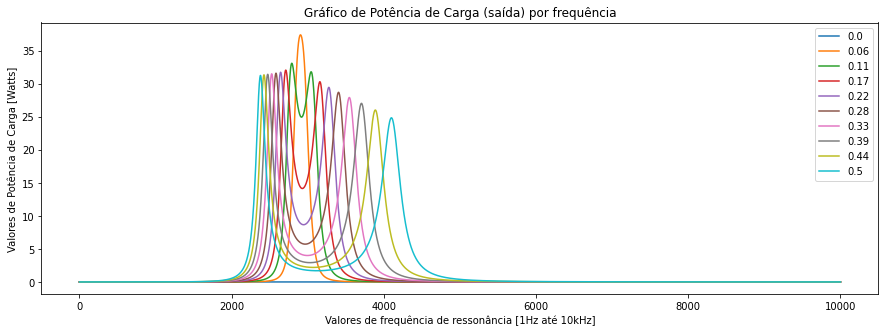

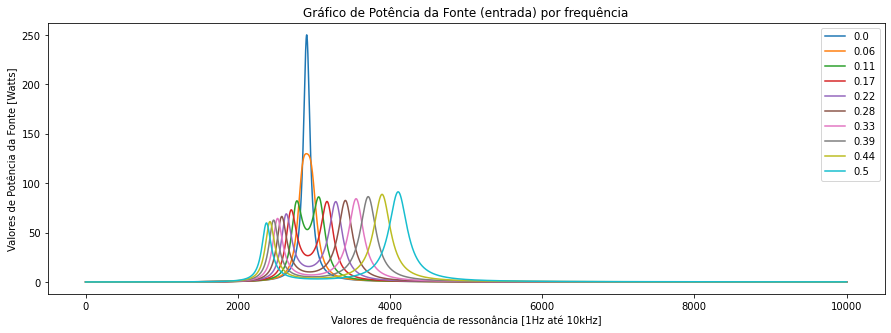

In [20]:
v1 = rect(10,0)
lista_ks = np.linspace(0,0.5, 10)

lista_plotpotcarga = []
lista_plotef = []
lista_plotpotfonte =[]

for k in lista_ks:
    listaPotCarga_ks =[]
    listaEf_ks = []
    listaPotFonte_ks =[]
    for freq in (listafreqr):
        w = 2*pi*freq
        xc1 = 1/(1j*w*c1)
        xc2 = 1/(1j*w*c2)
        paralelo = (xc2*rc)/(xc2+rc) 
        i1proj, i2proj = calcularTransformadores(v1,rc,freq,k=k)
        v2 = i2proj*paralelo
        pot_carga = (v2/sqrt(2))*(i2proj.conjugate()/sqrt(2))
        pot_fonte = (v1/sqrt(2))*(i1proj.conjugate()/sqrt(2))
        eficiencia = (pot_carga.real/pot_fonte.real)
        
        listaPotCarga_ks.append(abs(pot_carga.real))
        listaPotFonte_ks.append(abs(pot_fonte.real))
        listaEf_ks.append(abs(eficiencia))
    
    lista_plotpotcarga.append(listaPotCarga_ks)
    lista_plotpotfonte.append(listaPotFonte_ks)
    lista_plotef.append(listaEf_ks)


plt.figure(figsize=(15,5))
for i in range(len(lista_plotpotcarga)):
    plot = lista_plotpotcarga[i]
    plt.plot(listafreqr, plot, label=f"{round(lista_ks[i], 2)}")
plt.title("Gráfico de Potência de Carga (saída) por frequência")
plt.xlabel("Valores de frequência de ressonância [1Hz até 10kHz]")
plt.ylabel("Valores de Potência de Carga [Watts]")
plt.legend()

plt.figure(figsize=(15,5))
for i in range(len(lista_plotpotfonte)):
    plot = lista_plotpotfonte[i]
    plt.plot(listafreqr, plot, label=f"{round(lista_ks[i], 2)}")
plt.title("Gráfico de Potência da Fonte (entrada) por frequência")
plt.xlabel("Valores de frequência de ressonância [1Hz até 10kHz]")
plt.ylabel("Valores de Potência da Fonte [Watts]")
plt.legend()

plt.show()

<h4> Gráfico de eficiência para diferentes frequências e diferentes  $k$</h4>

<p> Para calcular a eficiência foi feita a razão entre potência real da carga pela potência real da fonte. Com isso feito para diferentes valores de $k$ e de frequência, o seguinte gráfico pôde ser plotado: </p>

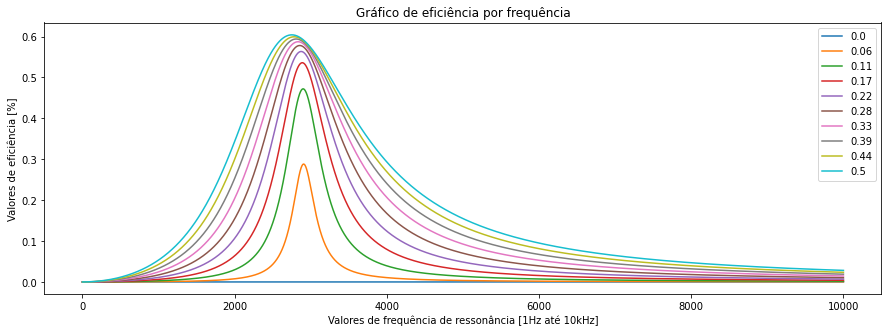

In [21]:
plt.figure(figsize=(15,5))
for i in range(len(lista_plotef)):
    plot = lista_plotef[i]
    plt.plot(listafreqr, plot, label=f"{round(lista_ks[i], 2)}")
plt.title("Gráfico de eficiência por frequência")
plt.xlabel("Valores de frequência de ressonância [1Hz até 10kHz]")
plt.ylabel("Valores de eficiência [%]")
plt.legend() 
   
plt.show()